# Trabajo Práctico 0:  Algoritmo de Maximización de la Esperanza

**Profesor**: Saúl Calderón Ramírez

**Estudiantes**:

* Ricardo Chacon
* Marco Ferraro
* Gabriel Valentine


## 1. Algoritmo de Maximización de la Esperanza con datos artificiales

En esta sección se llevará a cabo una implementación de un algoritmo de maximización de la esperanza. Se utilizará un grupo de funciones base.

### 1.1 Generate Data

Esta función se encarga de generar observaciones aleatorias de `K` distribuciones Gaussianas. Por defecto `K` va a presentar valor de 2.  Se recibe de parametro `N` que representa la tolidad de puntos u observaciones que se quiere generar. Un array de medias y otro de desviaciones estandar de las distribuciones respectivas.

Cabe destacar que esta función retorna todas las observaciones en una matriz de dimension `Nx1`.

In [98]:
import numpy as np

def generate_data(N, means: np.ndarray, stds: np.ndarray, K=2):
  if len(means) != len(stds):
    print("Error in dimensions")
    return None
  else:
    data = []
    for i in range(K):
      y = np.sqrt(-2 * np.log(np.random.rand(N // K))) * np.cos(2 * np.pi * np.random.rand(N // 2))
      y = (y * stds[i]) + means[i]

      data.append(y)

    X = np.concatenate(data)

    # Mezclar datos para que no esten ordenados
    np.random.shuffle(X)

    return X.reshape(-1, 1)



In [99]:
N = 100

means = [3.0, 7.0]
stds = [0.5, 0.8]

data = generate_data(N=100, means=means, stds=stds)
data

array([[3.19016906],
       [3.3981502 ],
       [6.95457659],
       [3.1457007 ],
       [7.80028055],
       [2.69640899],
       [7.49916548],
       [3.04614632],
       [2.91390589],
       [6.74760156],
       [7.52607941],
       [6.70820903],
       [3.17060047],
       [3.12213422],
       [7.33287935],
       [3.53034297],
       [3.9164771 ],
       [6.55454449],
       [7.5780227 ],
       [7.60995808],
       [4.46217303],
       [2.93369887],
       [5.84821788],
       [6.95510593],
       [2.24804161],
       [2.99506358],
       [8.46994295],
       [3.08909264],
       [2.45124671],
       [2.61140897],
       [7.03525883],
       [3.34302993],
       [7.44266118],
       [3.28925107],
       [3.59202503],
       [5.49817963],
       [6.65708384],
       [3.4770283 ],
       [6.99203679],
       [5.93545642],
       [2.90748834],
       [3.16996602],
       [7.1303993 ],
       [8.99134085],
       [5.78662828],
       [3.15151353],
       [3.00414052],
       [7.355

In [101]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(data, title='Two Normal Distributions'):
    hist_values, bin_edges = np.histogram(data, bins=20)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), color='skyblue', alpha=0.7, label='Frequency')
    ax.scatter(data, np.zeros_like(data), marker='o', s=30, color='b', label='Data')

    y_min, y_max = ax.get_ylim()
    ax.set_ylim(y_min - 0.5, y_max + 0.1)

    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.grid(True, which='both')

    ax.legend()
    plt.show()

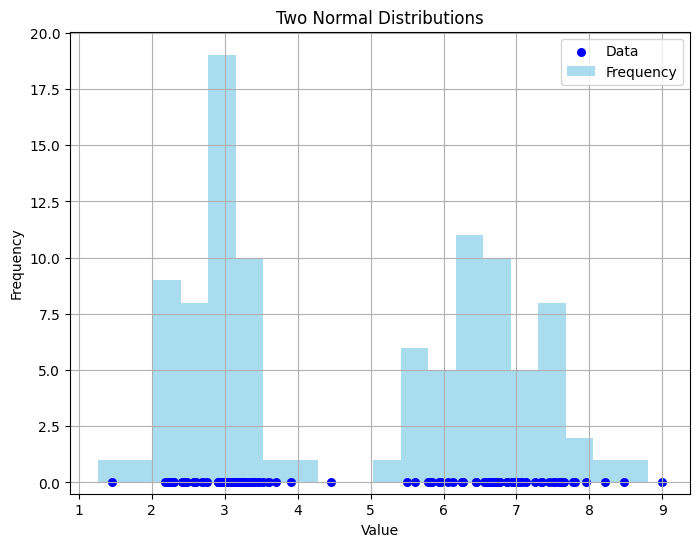

In [102]:
plot_data(data)

In [103]:

# El asterisco es para desempacar la tupla.
def init_random_parameters(K, mean_range=(0, 10), std_range=(0, 1)):
  means = np.random.uniform(*mean_range, size=K)
  stds = np.random.uniform(*std_range, size=K)

  P = np.column_stack((means, stds)).tolist()

  return P

In [104]:
P = init_random_parameters(2)
P

[[9.07734250921475, 0.28265398125701524],
 [3.760825689950671, 0.6684673233403788]]

In [105]:
import numpy as np

def calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k):
     if sigma_k == 0:
          return None
     else:
          log_likelihood = -0.5 * np.log(2 * np.pi * sigma_k**2) - 0.5 * (1 / sigma_k) * (x_n - mu_k)**2
          return log_likelihood


In [106]:
import unittest
import numpy as np

class TestCalculateLikelihood(unittest.TestCase):

    def test_likelihood_with_zero_sigma(self):
        x_n = 1.0
        mu_k = 1.0
        sigma_k = 0.0
        result = calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k)

        self.assertIsNone(result)

    def test_likelihood_1(self):
        sigma_k = 1.0
        x_n = 0.0
        mu_k = 0.0

        result = calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k)

        expected_result = -0.9189385332046727
        self.assertAlmostEqual(result, expected_result, places=5)

    def test_likelihood_2(self):
        sigma_k = 2.0
        x_n = 3.0
        mu_k = 1.5

        result = calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k)
        expected_result = -2.174585713764618
        self.assertAlmostEqual(result, expected_result, places=5)


In [107]:
if __name__ == '__main__':
    loader = unittest.TestLoader()
    suite = loader.loadTestsFromTestCase(TestCalculateLikelihood)
    runner = unittest.TextTestRunner()
    runner.run(suite)


...
----------------------------------------------------------------------
Ran 3 tests in 0.001s

OK


In [108]:
def calculate_membership_dataset(X_dataset, Parameters_matrix):
  clusters = len(Parameters_matrix)
  membership_matrix = []

  for row in X_dataset:
    m_index = []
    
    for k in range(clusters):
      like_index = calculate_likelihood_gaussian_observation(x_n=row[0], mu_k=Parameters_matrix[k][0], sigma_k=Parameters_matrix[k][1])
      m_index.append(like_index)
    membership_matrix.append(m_index)

  return membership_matrix

In [109]:
def make_membership_binary(membership_matrix):
  membership_matrix = np.array(membership_matrix)

  max_indices = np.argmax(membership_matrix, axis=1)
  result_matrix = np.zeros_like(membership_matrix)
  result_matrix[np.arange(membership_matrix.shape[0]), max_indices] = 1

  return result_matrix


In [110]:
membership_matrix = calculate_membership_dataset(data, P)
membership_matrix

[[-60.965017619495875, -0.7597496080035778],
 [-56.709662922788155, -0.6145551693936626],
 [-7.6265223485685745, -8.14559742684059],
 [-61.894711371031484, -0.7991903979889527],
 [-2.540360344840618, -12.721102092042118],
 [-71.68041841935472, -1.363619011810286],
 [-4.061222500784494, -10.969325235682012],
 [-64.00144442956869, -0.8982138277232495],
 [-66.85409034612046, -1.0526765318983924],
 [-9.256709452736906, -7.188770756286912],
 [-3.912231944059035, -11.120380658100357],
 [-9.58414257989635, -7.013921859868058],
 [-61.373273457604654, -0.7767413277883144],
 [-62.39024878974612, -0.8212917355466821],
 [-5.038581767741272, -10.060068353234186],
 [-54.08450728812886, -0.5559051618340727],
 [-46.77049000674726, -0.5342923448231779],
 [-10.913889314619441, -6.354051283844189],
 [-3.631929326558368, -11.414978012683838],
 [-3.464334260397623, -11.598103746139543],
 [-37.33361170935047, -0.8840930882624309],
 [-66.42318578204635, -1.0278926955323135],
 [-18.100655254798934, -3.7752726

In [111]:
binary_membership_matrix = make_membership_binary(membership_matrix)
binary_membership_matrix

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [112]:
import torch

def recalculate_parameters(X_dataset, Membership_data):
    X_torch = torch.tensor(X_dataset, dtype=torch.float32)
    Membership_torch = torch.tensor(Membership_data, dtype=torch.float32)

    # Calcular nuevas medias
    new_means = torch.matmul(Membership_torch.T, X_torch) / torch.sum(Membership_torch, dim=0, keepdim=True)

    # Calcular nuevas desviaciones estándar
    deviations = X_torch.unsqueeze(1) - new_means
    squared_deviations = deviations ** 2
    weighted_squared_deviations = squared_deviations * Membership_torch.unsqueeze(2)
    new_std = torch.sqrt(torch.sum(weighted_squared_deviations, dim=0) / torch.sum(Membership_torch, dim=0, keepdim=True))

    return new_means.numpy(), new_std.numpy()

# Ejemplo de uso
X_dataset = np.array([[2.5], [3.0], [1.8], [2.2]], dtype=np.float32)
Membership_data = np.array([[0.2, 0.8], [0.6, 0.4], [0.3, 0.7], [0.9, 0.1]], dtype=np.float32)

new_means, new_std = recalculate_parameters(X_dataset, Membership_data)

print("Nuevas Medias:")
print(new_means)

print("\nNuevas Desviaciones Estándar:")
print(new_std)



Nuevas Medias:
[[2.41 2.41]
 [2.34 2.34]]

Nuevas Desviaciones Estándar:
[[0.42532343 0.42532343]
 [0.4476606  0.4476606 ]]
